In [1]:
# 建立學生成績單
import numpy as np
import pandas as pd

# 建立50學生,每個學生有5科成績
np.random.seed(54) # 設定隨機種子以確保結果可重現
scores = np.random.randint(50, 101, size=(50, 5))
df_scores = pd.DataFrame(scores, columns=['國文', '英文', '數學', '自然', '社會'],index=range(1, 51))

# 設定欄的名稱和索引的名稱
df_scores.columns.name = '科目'
df_scores.index.name = '學生編號'
sum_scores = df_scores.sum(axis=1)
mean_scores = df_scores.mean(axis=1)
rand_scores = sum_scores.rank(method="min", ascending=False)
df_scores['總分'] = sum_scores
df_scores['平均'] = mean_scores
df_scores['排名'] = rand_scores
df_scores1 = df_scores.sort_values(by='排名')
df_scores1  # 顯示成績單

科目,國文,英文,數學,自然,社會,總分,平均,排名
學生編號,,,,,,,,
18,96,97,85,87,82,447,89.4,1.0
37,99,72,96,85,85,437,87.4,2.0
34,100,75,65,97,95,432,86.4,3.0
33,70,90,95,79,92,426,85.2,4.0
26,97,73,100,64,87,421,84.2,5.0
30,58,98,95,70,95,416,83.2,6.0
21,79,84,94,88,68,413,82.6,7.0
12,85,91,62,75,97,410,82.0,8.0
47,55,97,84,100,72,408,81.6,9.0


In [8]:
def cal1(series):
    # 計算最高分、最低分和標準差,只可以小數點後兩位
    return pd.Series([round(series.max(), 2), round(series.min(), 2), round(series.std(), 2)], index=['最高分', '最低分', '標準差'])


df_scores1[['國文', '英文', '數學','自然', '社會']].apply(cal1)  # 顯示前10名學生的國文、英文、數學成績

科目,國文,英文,數學,自然,社會
最高分,100.00,98.00,100.0,100.00,98.00
最低分,51.00,50.00,51.0,51.00,50.00
標準差,16.19,14.39,15.0,14.08,13.64


In [ ]:
def cal2(series):
    # 計算不及格科目數
    s_bool = series < 60
    return s_bool.sum()
df_scores1['不及格科目數'] = df_scores1[['國文', '英文', '數學', '自然', '社會']].apply(cal2, axis=1)  # 顯示前10名學生的國文、英文、數學成績
df_scores1

In [15]:
def cal3(series):
    # 傳出不及格科目名稱
    # 如果沒有就傳回"無"
    subjects = []
    if series['國文'] < 60:
        subjects.append('國文')
    if series['英文'] < 60:
        subjects.append('英文')
    if series['數學'] < 60:
        subjects.append('數學')
    if series['自然'] < 60:
        subjects.append('自然')
    if series['社會'] < 60:
        subjects.append('社會')
    if len(subjects) == 0:
        return '無'
    else:
        return ','.join(subjects)

df_scores1['不及格科目名稱'] = df_scores1[['國文', '英文', '數學', '自然', '社會']].apply(cal3, axis=1)
df_scores1  

科目,國文,英文,數學,自然,社會,總分,平均,排名,不及格科目數,不及格科目名稱
學生編號,,,,,,,,,,
18,96,97,85,87,82,447,89.4,1.0,0,無
37,99,72,96,85,85,437,87.4,2.0,0,無
34,100,75,65,97,95,432,86.4,3.0,0,無
33,70,90,95,79,92,426,85.2,4.0,0,無
26,97,73,100,64,87,421,84.2,5.0,0,無
30,58,98,95,70,95,416,83.2,6.0,1,國文
21,79,84,94,88,68,413,82.6,7.0,0,無
12,85,91,62,75,97,410,82.0,8.0,0,無
47,55,97,84,100,72,408,81.6,9.0,1,國文


In [ ]:
# 說明標準差的觀念
# 使用註解說明標準差的觀念
# 標準差是用來衡量一組數據的分散程度，表示數據點與平均值之間的差異有多大。
# 標準差越大，表示數據點分布得越廣，離平均值較遠；標準差越小，表示數據點較集中，離平均值較近。  
# DataFrame 範例
df = pd.DataFrame({
    '數學': [90, 85, 78, 92, 88],
    '科學': [50, 89, 94, 88, 92]
})
print(df.std())  # 數學: 5.368, 科學: 8.862


數學     5.458938
科學    18.379336
dtype: float64


In [19]:
import pandas as pd

# 建立 DataFrame
df = pd.DataFrame({
    '身高': [160, 170, 175, 165, 180],
    '體重': [50, 65, 70, 55, 80]
})
print(df)
# 計算相關矩陣（Pearson）
print(df.corr())


    身高  體重
0  160  50
1  170  65
2  175  70
3  165  55
4  180  80
          身高        體重
身高  1.000000  0.993399
體重  0.993399  1.000000


In [28]:
#某財務軟體公司在全國有許多代理商，為研究它的財務軟體產品的廣告投入與銷售額的關係，
#統計人員隨機選擇10家代理商進行觀察，搜集到年廣告投入費和月平均銷售額的數據，
#並編製成相關表
#相關係數計算
import pandas as pd
import numpy as np

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
            '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
data_df = pd.DataFrame(data,index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
print(data_df)
data_df.corr()  # 計算相關係數

      年廣告費投入  月均銷售額
2011    12.5   21.2
2012    15.3   23.9
2013    23.2   32.9
2014    26.4   34.1
2015    33.5   42.5
2016    34.4   43.2
2017    39.4   49.0
2018    45.2   52.8
2019    55.4   59.4
2020    60.9   63.5


,年廣告費投入,月均銷售額
年廣告費投入,1.000000,0.994198
月均銷售額,0.994198,1.000000


In [22]:
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont.ttf'

In [23]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

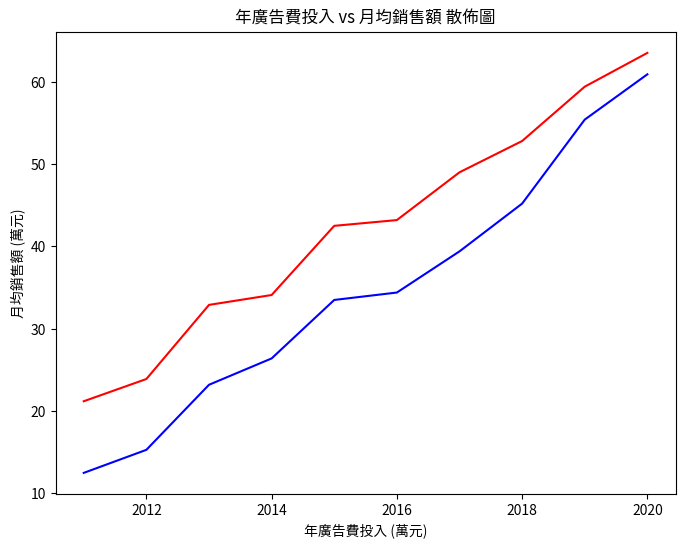

In [31]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(8, 6))
axes = figure.add_subplot(1, 1, 1)
# 改變marker顏色
axes.plot(data_df.index, data_df['月均銷售額'], color='red')
axes.plot(data_df.index, data_df['年廣告費投入'], color='blue')
axes.set_title('年廣告費投入 vs 月均銷售額 散佈圖')
axes.set_xlabel('年廣告費投入 (萬元)')
axes.set_ylabel('月均銷售額 (萬元)')
plt.show()